## Algorithm Evalution

In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

#### Import Dataset

In [2]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass   
0              1         0       3  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp   
0                              Braund, Mr. Owen Harris    male  22.0      1  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

#### Checking Missing values

In [6]:
S = df.isna().sum()
S

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
S[S>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

#### Seperate X and Y

In [8]:
X = df.drop(columns=['PassengerId','Name','Ticket','Survived'])
Y = df[['Survived']]

In [9]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [10]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [11]:
Y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

#### Seperate Cat and Con Features for X

In [12]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [13]:
cat

['Sex', 'Cabin', 'Embarked']

In [14]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

#### Create a preprocessing pipeline

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
# Num_pipe
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])
# Cat_pipe
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='constant',fill_value='unknown')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])
# Pre
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])

In [17]:
X_pre = pre.fit_transform(X).toarray()
X_pre

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ]])

In [18]:
cols = pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Cabin_A10',
       'cat__Cabin_A14', 'cat__Cabin_A16', 'cat__Cabin_A19',
       'cat__Cabin_A20', 'cat__Cabin_A23', 'cat__Cabin_A24',
       'cat__Cabin_A26', 'cat__Cabin_A31', 'cat__Cabin_A32',
       'cat__Cabin_A34', 'cat__Cabin_A36', 'cat__Cabin_A5',
       'cat__Cabin_A6', 'cat__Cabin_A7', 'cat__Cabin_B101',
       'cat__Cabin_B102', 'cat__Cabin_B18', 'cat__Cabin_B19',
       'cat__Cabin_B20', 'cat__Cabin_B22', 'cat__Cabin_B28',
       'cat__Cabin_B3', 'cat__Cabin_B30', 'cat__Cabin_B35',
       'cat__Cabin_B37', 'cat__Cabin_B38', 'cat__Cabin_B39',
       'cat__Cabin_B4', 'cat__Cabin_B41', 'cat__Cabin_B42',
       'cat__Cabin_B49', 'cat__Cabin_B5', 'cat__Cabin_B50',
       'cat__Cabin_B51 B53 B55', 'cat__Cabin_B57 B59 B63 B66',
       'cat__Cabin_B58 B60', 'cat__Cabin_B69', 'cat__Cabin_B71',
       'cat__Cabin_B73', 'cat__Cabin_B77', 'cat__Cabin_B78',
       '

In [19]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,...,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Embarked_unknown
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Apply train test split

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [21]:
xtrain.shape

(712, 159)

In [22]:
xtest.shape

(179, 159)

#### Algo Evaluation

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [26]:
dct = {'Logistic' : LogisticRegression(),
       'Decision Tree' : DecisionTreeClassifier(),
       'Random forest' : RandomForestClassifier(),
       'Gradient Boost' : GradientBoostingClassifier(),
       'KNN' : KNeighborsClassifier(),
       'SVM' : SVC()}

In [27]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier()), ('KNN', KNeighborsClassifier()), ('SVM', SVC())])

In [28]:

from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
tr = []
tr_cv = []
ts = []
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict train and test results
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Calculate F1 score in training
    f1_tr = f1_score(ytrain, ypred_tr)
    tr.append(f1_tr)
    # Calculate F1 Score in train Cross validated
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1')
    f1_cv = scores.mean()
    tr_cv.append(f1_cv)
    # Calculate F1 score in testing
    f1_ts = f1_score(ytest, ypred_ts)
    ts.append(f1_ts)
    # Print the results for model
    print(f'Model Name : {name}\n')
    print(f'Training F1 : {f1_tr:.4f}')
    print(f'Training F1 CV : {f1_cv:.4f}')
    print(f'Testing F1 : {f1_ts:.4f}')
    print('\n=================================================\n')

Model Name : Logistic

Training F1 : 0.7669
Training F1 CV : 0.7067
Testing F1 : 0.7778


Model Name : Decision Tree

Training F1 : 0.9791
Training F1 CV : 0.6920
Testing F1 : 0.7368


Model Name : Random forest

Training F1 : 0.9791
Training F1 CV : 0.7149
Testing F1 : 0.7259


Model Name : Gradient Boost

Training F1 : 0.8589
Training F1 CV : 0.7509
Testing F1 : 0.7407


Model Name : KNN

Training F1 : 0.8118
Training F1 CV : 0.7041
Testing F1 : 0.7338


Model Name : SVM

Training F1 : 0.7732
Training F1 CV : 0.7551
Testing F1 : 0.7660




#### Create a dataframe to show results

In [29]:
dct.keys()

dict_keys(['Logistic', 'Decision Tree', 'Random forest', 'Gradient Boost', 'KNN', 'SVM'])

In [31]:
eval_dct = {'Model_name':list(dct.keys()),
            'Train F1': tr,
            'Test F1': ts,
            'Train F1 CV': tr_cv}

In [32]:
eval_df = pd.DataFrame(eval_dct)
eval_df

,Model_name,Train F1,Test F1,Train F1 CV
0,Logistic,0.766859,0.777778,0.706743
1,Decision Tree,0.979127,0.736842,0.692002
2,Random forest,0.979127,0.725926,0.714870
3,Gradient Boost,0.858871,0.740741,0.750895
4,KNN,0.811765,0.733813,0.704128
5,SVM,0.773176,0.765957,0.755126


In [35]:
eval_df.sort_values(by='Test F1',ascending=False)

,Model_name,Train F1,Test F1,Train F1 CV
0,Logistic,0.766859,0.777778,0.706743
5,SVM,0.773176,0.765957,0.755126
3,Gradient Boost,0.858871,0.740741,0.750895
1,Decision Tree,0.979127,0.736842,0.692002
4,KNN,0.811765,0.733813,0.704128
2,Random forest,0.979127,0.725926,0.714870


#### Create and tune Logistic Regression

In [36]:
params = {'C':[0.01, 0.1, 1, 10, 50, 100,1000]}

In [37]:
from sklearn.model_selection import RandomizedSearchCV
lr = LogisticRegression()
rscv = RandomizedSearchCV(lr, param_distributions=params, cv=5, scoring='f1')  # Binary Classification f1, Multiclass f1_macro, regression - neg_mse
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 50, 100, 1000]},
                   scoring='f1')

In [38]:
rscv.best_params_

{'C': 10}

In [39]:
rscv.best_score_

0.7251923768428623

In [41]:
best_lr = rscv.best_estimator_
best_lr

LogisticRegression(C=10)

#### Evaluate accuracy in train and test

In [42]:
best_lr.score(xtrain,ytrain)

0.8497191011235955

In [44]:
best_lr.score(xtest,ytest)

0.8100558659217877

#### Predict results in train and test

In [45]:
ypred_tr = best_lr.predict(xtrain)
ypred_ts = best_lr.predict(xtest)

In [46]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [47]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [48]:
ypred_ts[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [49]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


#### Create a confusion matrix for test

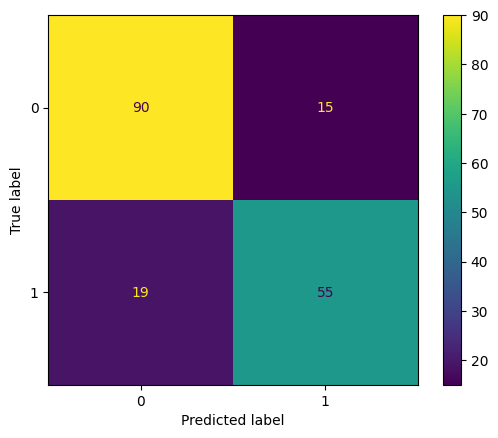

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_lr.classes_)
cfd.plot()

#### Check classification report

In [52]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



#### Plotting ROC - AUC curve in train and test

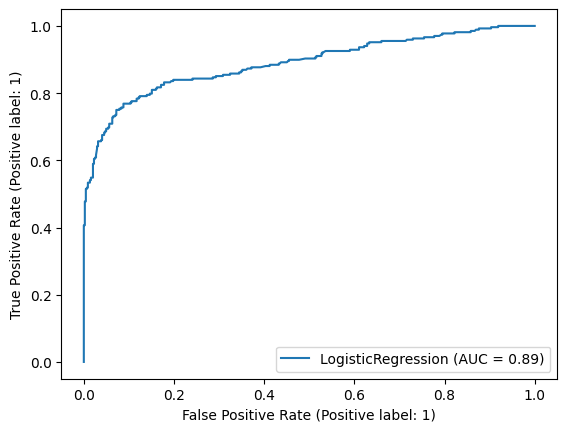

In [53]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr, xtrain, ytrain)

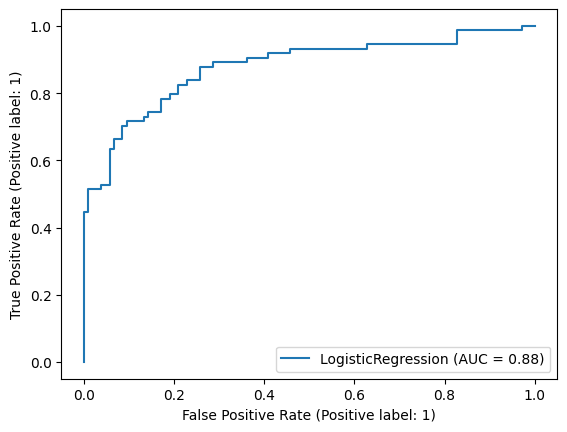

In [54]:
RocCurveDisplay.from_estimator(best_lr,xtest,ytest)

#### Predicting test_titanic.csv

In [55]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
xnew.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### To preprocess out of sample data use pre.transform()

In [57]:
xnew_pre = pre.transform(xnew).toarray()
xnew_pre

array([[ 0.82737724,  0.39488658, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  1.35550962,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [-0.36936484,  2.50825727, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.82737724,  0.70228595, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724, -0.1046374 , -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  0.        ]])

In [58]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,...,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Embarked_unknown
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Predictions

In [59]:
preds = best_lr.predict(xnew_pre)

In [60]:
preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

#### Probability

In [61]:
prob = best_lr.predict_proba(xnew_pre)[:,1]
prob

array([0.10575062, 0.37791046, 0.08803413, 0.10453967, 0.58062053,
       0.15817303, 0.68439845, 0.15464043, 0.78535289, 0.07053275,
       0.10085442, 0.23516423, 0.9490681 , 0.04980559, 0.67561374,
       0.83247403, 0.20709941, 0.17390889, 0.55823093, 0.57791286,
       0.20857875, 0.16392008, 0.90452944, 0.54071979, 0.95738929,
       0.03493908, 0.97051704, 0.16620307, 0.4114467 , 0.07820218,
       0.07760885, 0.13425039, 0.46321161, 0.51201456, 0.34860692,
       0.1873771 , 0.6362293 , 0.69354224, 0.11194358, 0.12345573,
       0.09149134, 0.52417114, 0.06530005, 0.78564003, 0.87920451,
       0.11121222, 0.46768424, 0.13026177, 0.90794784, 0.52057259,
       0.50954909, 0.27876553, 0.70617306, 0.82563757, 0.27201168,
       0.06310101, 0.07998179, 0.11018245, 0.07514598, 0.98260829,
       0.14340121, 0.17979994, 0.13890552, 0.74378597, 0.80065841,
       0.80362793, 0.77066648, 0.24251197, 0.59261017, 0.70880563,
       0.72968981, 0.12642562, 0.62762602, 0.61347676, 0.97879

#### Save this predictions in dataframe

In [62]:
df_final = xnew[['PassengerId']]
df_final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [63]:
df_final['Survived_pred'] = preds

In [64]:
df_final['Survived_pred'] = prob

In [65]:
df_final


,PassengerId,Survived_pred
0,892,0.105751
1,893,0.377910
2,894,0.088034
3,895,0.104540
4,896,0.580621
...,...,...
413,1305,0.100920
414,1306,0.961062
415,1307,0.070894
416,1308,0.100920


#### Save results to csv

In [72]:
df_final.to_csv('Resuls.csv',index=False)

In [73]:
df_final['Survived_pred'].value_counts()

Survived_pred
0.130262    9
0.100920    6
0.700028    5
0.140278    3
0.100708    3
           ..
0.030193    1
0.677227    1
0.146991    1
0.114828    1
0.098492    1
Name: count, Length: 383, dtype: int64

<Axes: xlabel='Survived_pred'>

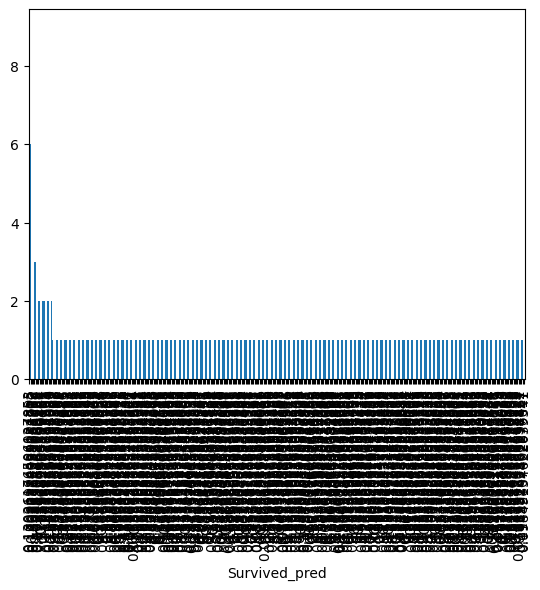

In [74]:
df_final['Survived_pred'].value_counts().plot(kind='bar')